In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os

files = [f for f in os.listdir() if '.npy' in f]
files.sort()
files

# np.shape(PACz[:21,15:36])
# freqs4pha = np.arange(6,10.1,0.2)
# freqs4pow = np.arange(20,61,2)
# print(len(freqs4pha))
# print(len(freqs4pow))
# print(np.shape(PACz[:21,15:36]))

files

['VR5_ChABC PFC-HPC_Rside Rewarded z-scored PAC 0-1000ms.npy',
 'VR5_ChABC PFC-HPC_Rside Rewarded z-scored PAC 0-400ms.npy',
 'VR5_ChABC PFC-HPC_Rside Rewarded z-scored PAC 400-800ms.npy',
 'VR5_ChABC PFC-HPC_Rside Unrewarded z-scored PAC 0-1000ms.npy',
 'VR5_ChABC PFC-HPC_Rside Unrewarded z-scored PAC 0-400ms.npy',
 'VR5_ChABC PFC-HPC_Rside Unrewarded z-scored PAC 400-800ms.npy',
 'VR5_Vehicle PFC-HPC_Rside Rewarded z-scored PAC 0-1000ms.npy',
 'VR5_Vehicle PFC-HPC_Rside Rewarded z-scored PAC 0-400ms.npy',
 'VR5_Vehicle PFC-HPC_Rside Rewarded z-scored PAC 400-800ms.npy',
 'VR5_Vehicle PFC-HPC_Rside Unrewarded z-scored PAC 0-1000ms.npy',
 'VR5_Vehicle PFC-HPC_Rside Unrewarded z-scored PAC 0-400ms.npy',
 'VR5_Vehicle PFC-HPC_Rside Unrewarded z-scored PAC 400-800ms.npy']

3.7169889840837267
3.88004106940984
3.9154259943690213
4.463874882143543
4.631790342293695
4.772195406039882
3.0441135162195243
4.245054720618514
3.657118583019464
3.7104047247815646
3.517199556013722
3.777793254621992


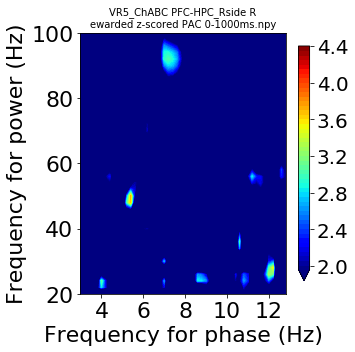

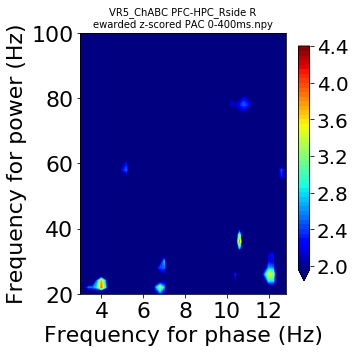

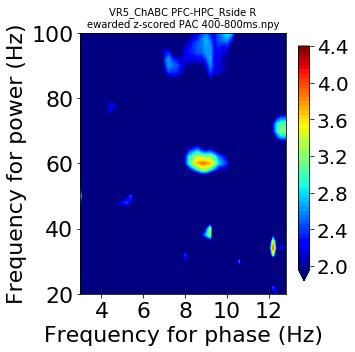

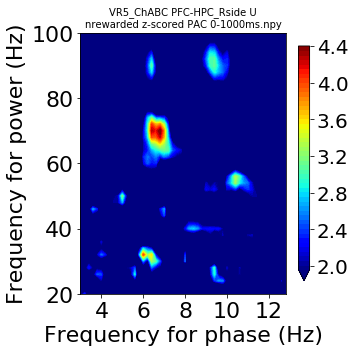

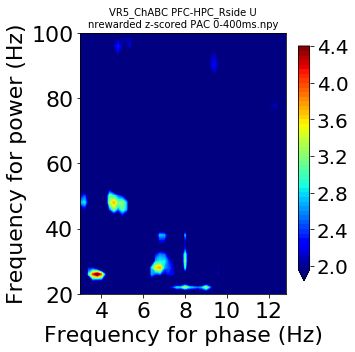

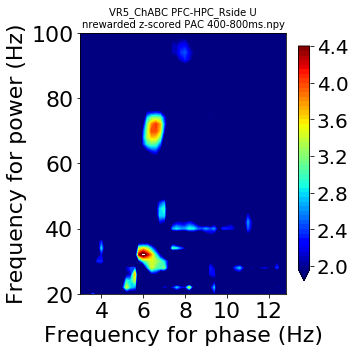

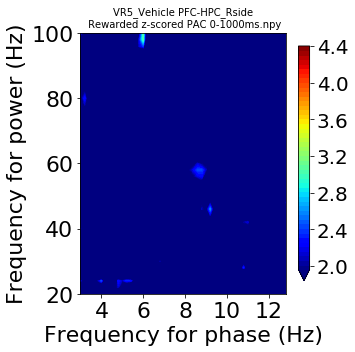

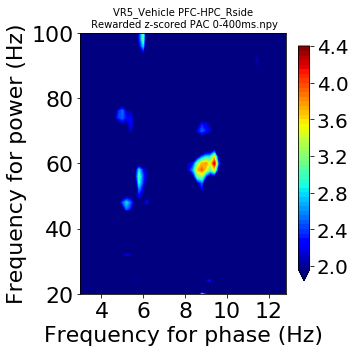

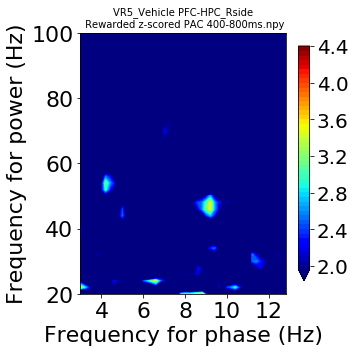

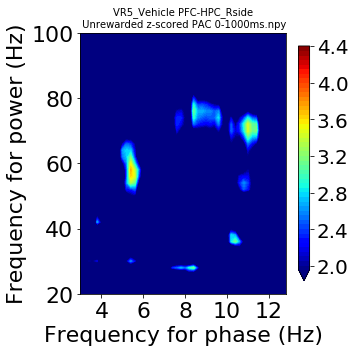

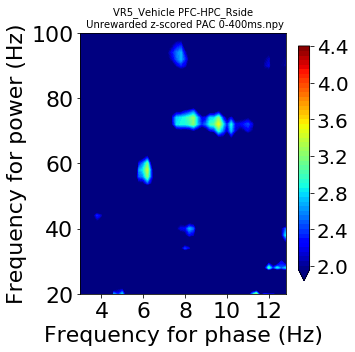

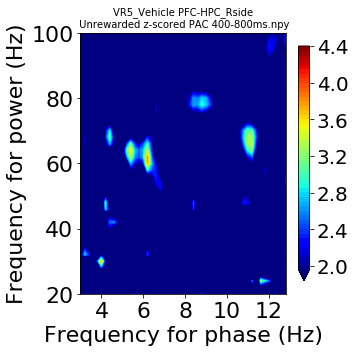

In [4]:
floor = 1.96
ceil = 4.4

PACz = np.load(files[0], allow_pickle=True)
PACz = PACz[:41]

def plot_PACz(PACz, file):
    freqs4pha = np.arange(3,13,0.2)
    freqs4pow = np.arange(20,101,2)

    f, ax = plt.subplots(1,1)
    f.set_figheight(5)
    f.set_figwidth(5)

    cs = ax.contourf(freqs4pha, freqs4pow, PACz[:], levels=np.linspace(floor, ceil), extend='min', cmap='jet')
    cbar = plt.colorbar(cs, ticks=np.arange(-2,4.7,0.4),shrink=0.9)
    cbar.ax.tick_params(labelsize=20)

    ax.tick_params(axis='x', labelsize=22)
    ax.tick_params(axis='y', labelsize=22)
    ax.set_xlabel('Frequency for phase (Hz)', fontsize=22)
    ax.set_ylabel('Frequency for power (Hz)', fontsize=22)
    ax.set_title(file[:25]+'\n'+file[25:], size=10)
    
    plt.setp(ax, xticks=[4,6,8,10,12], xticklabels=['4','6','8','10','12'])
    plt.tight_layout()

    plt.savefig(file.replace('.npy', '.png'), dpi=600)
    
for file in files:
    PACz = np.load(file, allow_pickle=True)
    PACz = PACz[:41]
    print(np.max(PACz))
    plot_PACz(PACz, file)